# Linear Regression Sci-kit Learn
## Steps
      # Data Wrangling
          # Missing Values
          # Outliers
      # Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
#from sklearn.datasets import load_iris

In [7]:
#df2=load_iris()
#X=df2.data
#y=df2.target

In [47]:
df=sns.load_dataset("titanic")

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
X=df["age"]
y=df["fare"]

In [13]:
X.isnull().sum() / len(X) * 100

19.865319865319865

In [16]:
X["age"].fillna(X["age"].mean())

KeyError: 'age'

In [18]:
print(X.mean())
print(X.median())
print(X.mode()[0])

29.699117647058763
29.69911764705882
29.69911764705882


In [15]:
X.fillna(X.mean(),inplace = True)

In [49]:
X=df[["age"]]

In [21]:
X["age"].fillna(X["age"].mean(), inplace = True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
y.isnull().sum()

0

<AxesSubplot:xlabel='age', ylabel='fare'>

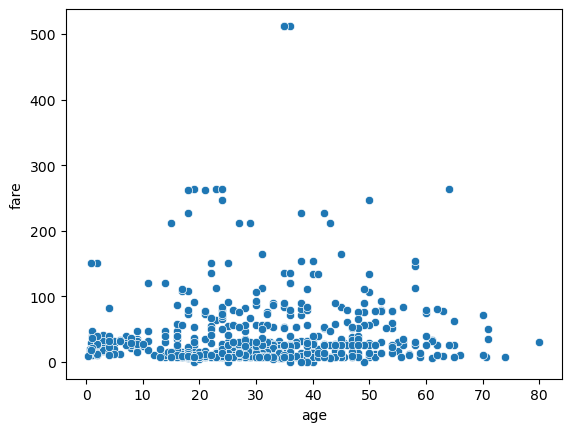

In [10]:
sns.scatterplot(x="age",y="fare",data=df)

<AxesSubplot:xlabel='age', ylabel='fare'>

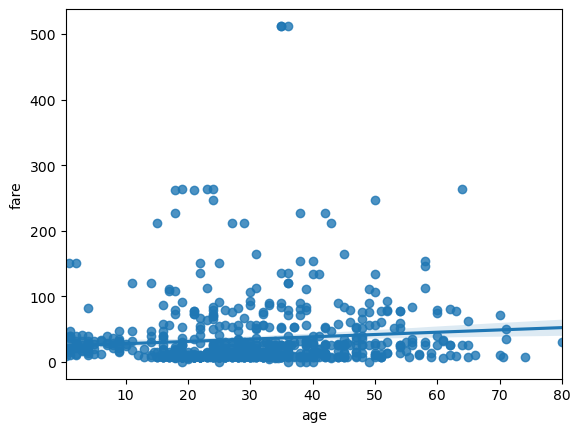

In [11]:
sns.regplot(x="age",y="fare",data=df)

In [29]:
df[["age","fare"]]

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [52]:
df2=pd.DataFrame(df[["age","fare"]])

In [53]:
df2.isnull().sum()

age     177
fare      0
dtype: int64

In [54]:
df2["age"].fillna(df2["age"].mean(), inplace = True)

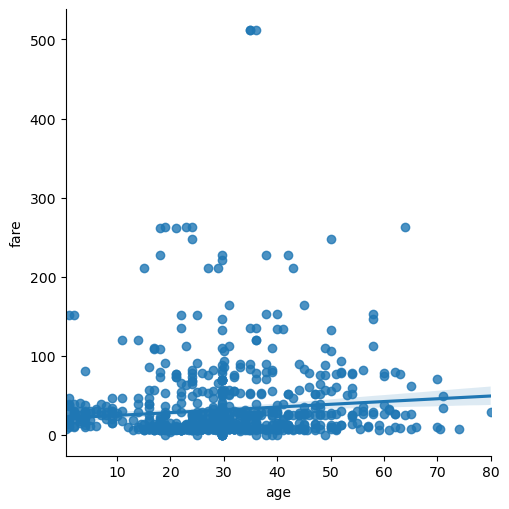

In [32]:
sns.lmplot(x="age",y="fare",data=df2)

### Outliers

<AxesSubplot:ylabel='age'>

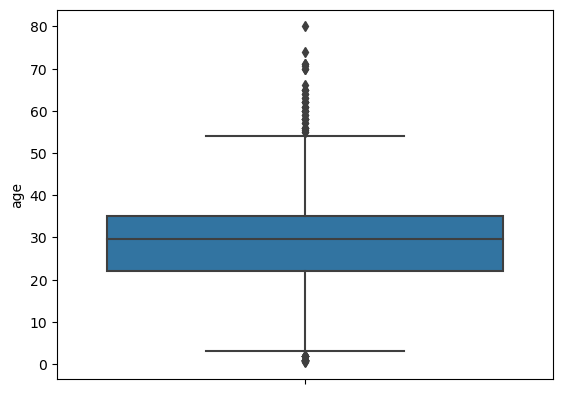

In [55]:
sns.boxplot(data=df2,y="age")

From figure, lowerbound is almost 5 and upper bound is 55

In [56]:
df2=df2[( df2["age"] > 5 ) & ( df2["age"] < 55 )]

<AxesSubplot:ylabel='age'>

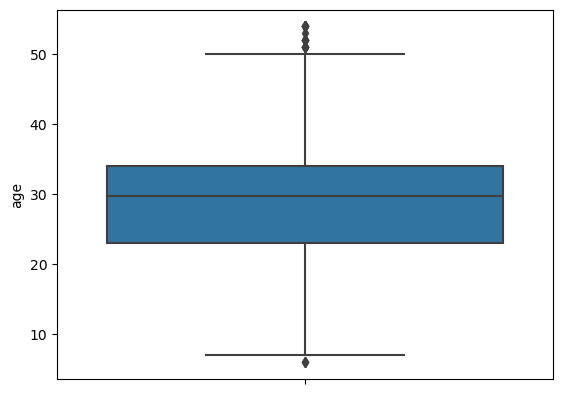

In [57]:
sns.boxplot(y=df2["age"])

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

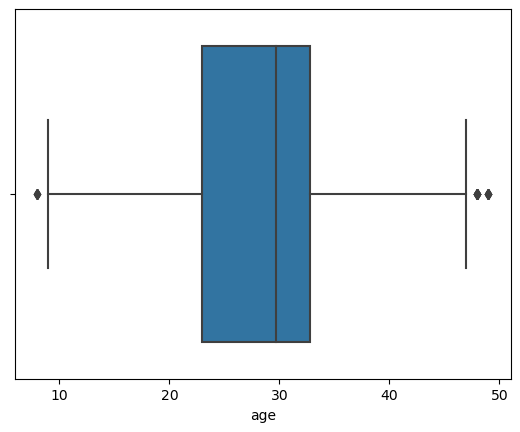

In [58]:
df2=df2[ (df2["age"] > 7) & (df2["age"] < 50)]
sns.boxplot(df2['age'])

<AxesSubplot:ylabel='fare'>

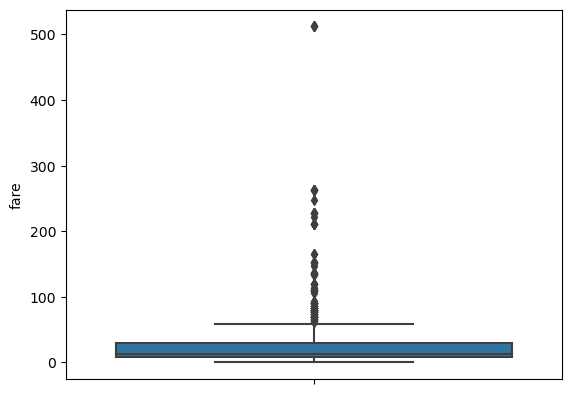

In [59]:
sns.boxplot(y=df2["fare"])

<AxesSubplot:ylabel='fare'>

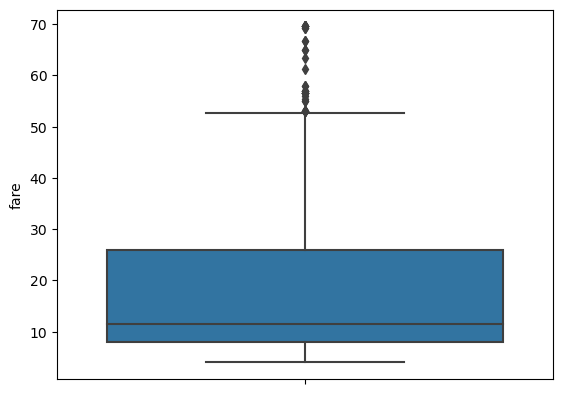

In [60]:
df2 = df2[( df2["fare"] > 1) & (df2["fare"] < 70 ) ]
sns.boxplot(y=df2["fare"])

<AxesSubplot:ylabel='fare'>

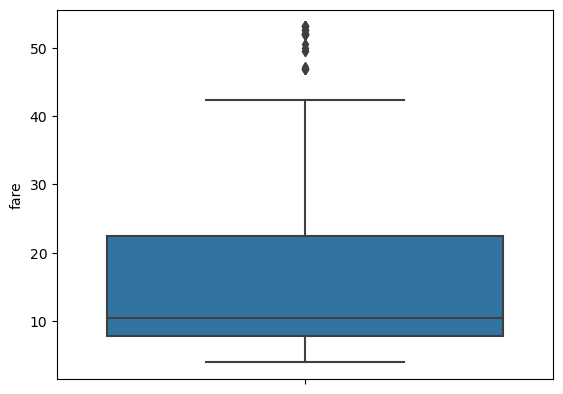

In [61]:
df2 = df2[( df2["fare"] > 1) & (df2["fare"] < 55 ) ]
sns.boxplot(y=df2["fare"])

In [62]:
df2.shape

(637, 2)

In [63]:
df2.isnull().sum()

age     0
fare    0
dtype: int64

In [72]:
X = df2[["age"]]
y = df2["fare"]

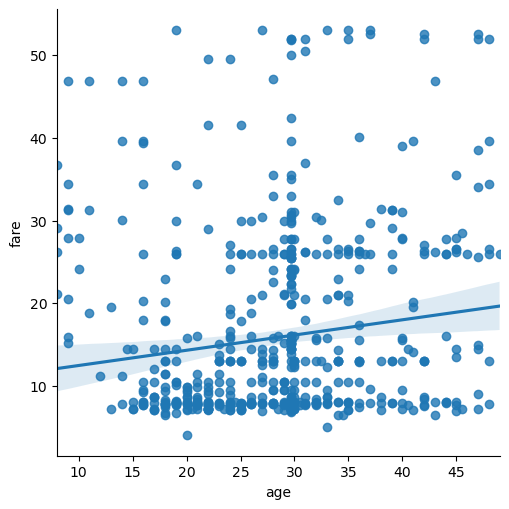

In [68]:
sns.lmplot(x="age" , y="fare" , data = df2)

# Model

In [69]:
model = LinearRegression()

In [73]:
model.fit(X , y)

LinearRegression()

In [74]:
model.coef_

array([0.18434238])

In [75]:
model.intercept_

10.630459299300117

### AGE ke hissab se FARE 🤣🤣

In [78]:
model.predict([["50"]])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([19.84757846])

# Model Evaluation

#### R^2
#### MSE = Mean Squared Error
#### MAS = Mean Absolute Error
#### RMSE = Root mean square erro

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [82]:
X_train.shape, X_test.shape

((509, 1), (128, 1))

In [85]:
X.shape

(637, 1)

In [84]:
model = LinearRegression()

model.fit(X_train , y_train)

LinearRegression()

In [86]:
model.score(X_test,y_test)

0.005237602306362388

In [87]:
y_pred = model.predict(X_test)

In [90]:
y_pred

array([16.11658044, 15.0710995 , 16.24947392, 14.21570601, 13.64544368,
       18.20754231, 15.73640555, 18.01745487, 16.49675532, 16.30666788,
       16.24947392, 12.88509391, 16.24947392, 17.44719254, 15.926493  ,
       16.30666788, 19.53815441, 16.24947392, 18.20754231, 16.24947392,
       18.77780464, 16.49675532, 16.24947392, 15.926493  , 13.83553113,
       16.24947392, 16.24947392, 16.24947392, 15.16614323, 15.73640555,
       16.24947392, 16.68684277, 16.24947392, 14.97605578, 14.5958809 ,
       17.63727998, 16.24947392, 16.24947392, 12.31483158, 17.44719254,
       15.926493  , 14.02561857, 19.15797952, 17.44719254, 14.78596834,
       13.2652688 , 15.73640555, 16.02153672, 14.02561857, 16.24947392,
       16.24947392, 16.24947392, 15.16614323, 16.4017116 , 13.2652688 ,
       13.83553113, 16.24947392, 14.97605578, 19.53815441, 17.06701765,
       16.30666788, 16.30666788, 16.24947392, 16.78188649, 16.24947392,
       16.68684277, 15.16614323, 16.24947392, 14.78596834, 14.21

In [92]:
y_test=np.array(y_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

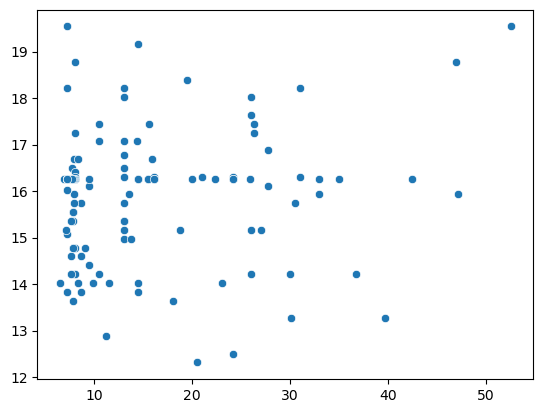

In [99]:
sns.scatterplot(y_test,y_pred)

### Model Visualization

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


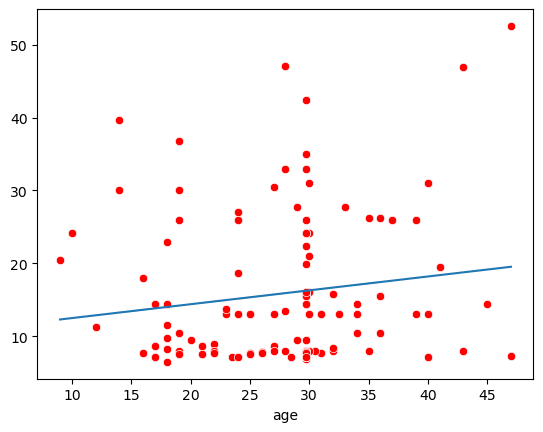

In [105]:
sns.scatterplot(X_test["age"],y_test,color="r",markers="+")
sns.lineplot(X_test["age"],y_pred)
plt.show()

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true= y_test , y_pred = y_pred)
rmse = mean_squared_error(y_true= y_test , y_pred = y_pred, squared=False)
r2 = r2_score(y_true = y_test, y_pred = y_pred)

In [110]:
print("Mean Absolute Error : ",mae)
print("Mean Square Error : ",mse)
print("Root Mean Square Error : ", rmse)
print("R Sqaured Error", r2)

Mean Absolute Error :  8.067247735663228
Mean Square Error :  98.77043317688445
Root Mean Square Error 9.938331508703282
R Sqaured Error 0.005237602306362388


In [113]:
import math

In [114]:
math.sqrt(mse)

9.938331508703282

In [115]:
np.sqrt(mse)

9.938331508703282